In [16]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_spreading  import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade


In [17]:
def get_starting_nodes(G, method,n):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)    
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_n = sorted_nodes[:n]
        
    # Extract only the node IDs from the sorted list
    top_node_ids = [node for node, _ in top_n]

    return top_node_ids


Load graph.

In [18]:
G = nx.read_edgelist('M1/edges.csv', delimiter=',')

In [19]:
immune_nodes_degree = get_starting_nodes(G, 'degree', 100)
immune_nodes_closeness = get_starting_nodes(G, 'closeness', 100)
immune_nodes_betweenness = get_starting_nodes(G, 'betweenness', 100)

In [20]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

# Check that the set of random starting is not in the set of immunized nodes.
while (set(random_nodes) & set(immune_nodes_degree)) or (set(random_nodes) & set(immune_nodes_closeness)) or (set(random_nodes) & set(immune_nodes_betweenness)):
    random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

In [21]:
threshold_degree_immune_100 = SIR_threshold(G, kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
threshold_closeness_immune_100 = SIR_threshold(G ,kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
threshold_between_immune_100 = SIR_threshold(G,kappa = 3,  beta = 0.8, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
threshold_degree = SIR_threshold(G, beta = 0.8,kappa = 3, gamma = 3,starting_nodes= random_nodes)

In [22]:
cascade_degree_immune_100 = SIR_cascade(G,  beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
cascade_closeness_immune_100 = SIR_cascade(G , beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
cascade_between_immune_100 = SIR_cascade(G,  beta = 0.05, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
cascade_random = SIR_cascade(G, beta = 0.05, gamma = 3,starting_nodes= random_nodes)

In [23]:
classical_degree_immune_100 = SIR_classical(G,  beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_degree)
classical_closeness_immune_100 = SIR_classical(G , beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_closeness)
classical_between_immune_100 = SIR_classical(G,  beta = 0.3, gamma = 3,starting_nodes= random_nodes, immune_nodes=immune_nodes_betweenness)
classical_random = SIR_classical(G, beta = 0.3, gamma = 3,starting_nodes= random_nodes)

In [24]:
cascade_immunity = [
    cascade_degree_immune_100,
    cascade_closeness_immune_100,
    cascade_between_immune_100,
    cascade_random
]

In [25]:
threshold_immunity = [
    threshold_degree_immune_100,
    threshold_closeness_immune_100,
    threshold_between_immune_100,
    threshold_degree
]

In [26]:
classical_immunity = [
    classical_degree_immune_100,
    classical_closeness_immune_100,
    classical_between_immune_100,
    classical_random
]

In [27]:
data_frames = [classical_immunity, threshold_immunity, cascade_immunity]

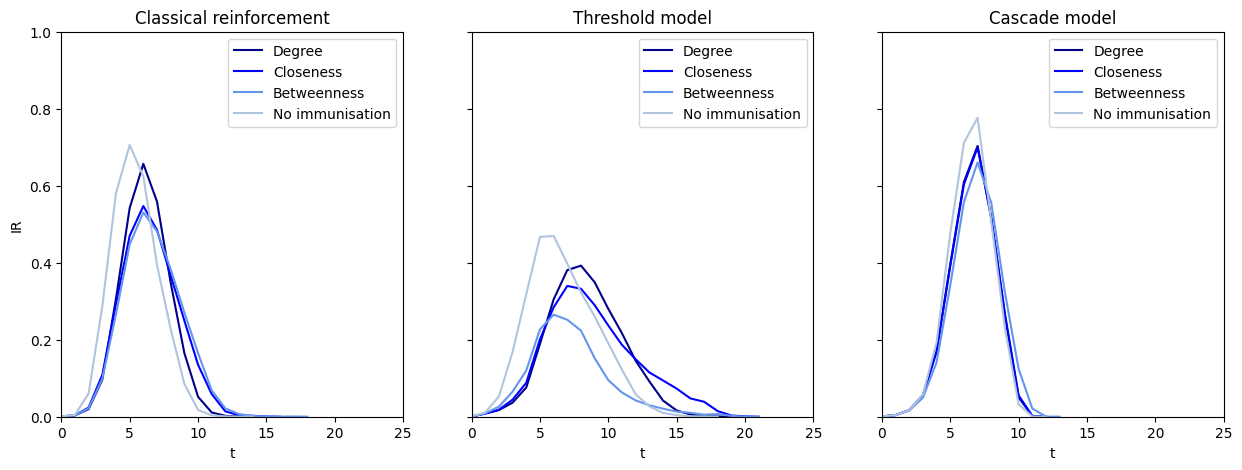

In [28]:
methods = ['Degree', 'Closeness', 'Betweenness','No immunisation']

# Define a custom color palette
custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']  # Add more colors if needed

# Set the size of the plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)  # Adjust the width and height as needed

# Create a graph with the different df's
for i, data_frame in enumerate(data_frames):
    for j, df_data in enumerate(data_frame):
        sns.lineplot(data=df_data, x='t', y='IR', label=f'{methods[j]}', color=custom_palette[j], ax=ax[i])

# Add titles
ax[0].set_title('Classical reinforcement')
ax[1].set_title('Threshold model')
ax[2].set_title('Cascade model')

# Set x and y axis limits
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.savefig('Immunity.png')

# Show the plot
plt.show()

In [44]:
data_frames[2][0]

,t,SR,IR,RR,IR+RR
0,0,0.999300,0.000700,0.069979,0.070679
1,1,0.925752,0.004269,0.069979,0.074248
2,2,0.913156,0.016865,0.069979,0.086844
3,3,0.872918,0.056403,0.070679,0.127082
4,4,0.755633,0.170119,0.074248,0.244367
5,5,0.517845,0.395311,0.086844,0.482155
6,6,0.263261,0.609657,0.127082,0.736739
7,7,0.052204,0.703429,0.244367,0.947796
8,8,0.003569,0.514276,0.482155,0.996431
9,9,0.002099,0.261162,0.736739,0.997901


In [45]:
data_frames[2][1]

,t,SR,IR,RR,IR+RR
0,0,0.999300,0.000700,0.069979,0.070679
1,1,0.925752,0.004269,0.069979,0.074248
2,2,0.913156,0.016865,0.069979,0.086844
3,3,0.873058,0.056263,0.070679,0.126942
4,4,0.756823,0.168929,0.074248,0.243177
5,5,0.521624,0.391533,0.086844,0.478376
6,6,0.269279,0.603779,0.126942,0.730721
7,7,0.057453,0.699370,0.243177,0.942547
8,8,0.003499,0.518125,0.478376,0.996501
9,9,0.002099,0.267180,0.730721,0.997901


In [47]:
data_frames[2][2]

,t,SR,IR,RR,IR+RR
0,0,0.999300,0.000700,0.069979,0.070679
1,1,0.925752,0.004269,0.069979,0.074248
2,2,0.913926,0.016095,0.069979,0.086074
3,3,0.879916,0.049405,0.070679,0.120084
4,4,0.784605,0.141148,0.074248,0.215395
5,5,0.572778,0.341148,0.086074,0.427222
6,6,0.322463,0.557453,0.120084,0.677537
7,7,0.124213,0.660392,0.215395,0.875787
8,8,0.017075,0.555703,0.427222,0.982925
9,9,0.000210,0.322253,0.677537,0.999790


In [46]:
data_frames[2][3]

,t,SR,IR,RR,IR+RR
0,0,0.999300,0.000700,0.000000,0.000700
1,1,0.995731,0.004269,0.000000,0.004269
2,2,0.983135,0.016865,0.000000,0.016865
3,3,0.941498,0.057803,0.000700,0.058502
4,4,0.802239,0.193492,0.004269,0.197761
5,5,0.507208,0.475927,0.016865,0.492792
6,6,0.230021,0.711477,0.058502,0.769979
7,7,0.025612,0.776627,0.197761,0.974388
8,8,0.000420,0.506788,0.492792,0.999580
9,9,0.000000,0.230021,0.769979,1.000000
